In [113]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 


cpdf = pd.read_csv('Chicago Public Data_Cleaned for Zipcode Specificity .csv')
print(cpdf.head())


   School_ID  Legacy_Unit_ID  Finance_ID                   Short_Name  \
0   610357.0          7930.0     46461.0                      SPRY HS   
1   610334.0          7690.0     46471.0                      RABY HS   
2   609723.0          1470.0     47041.0                  MARSHALL HS   
3   610385.0          7630.0     55181.0             MULTICULTURAL HS   
4   400059.0          1106.0     66092.0  NORTH LAWNDALE - COLLINS HS   

                                Long_Name Primary_Category Is_High_School  \
0        Spry Community Links High School               HS           True   
1                     Al Raby High School               HS           True   
2  John Marshall Metropolitan High School               HS           True   
3    Multicultural Academy of Scholarship               HS           True   
4   North Lawndale College Prep - Collins               HS           True   

  Is_Middle_School Is_Elementary_School Is_Pre_School  ...  \
0            False                Fa

In [ ]:
Created a sql database

In [26]:
conn = sqlite3.connect('Chicago_Public.sqlite')

In [ ]:
Sent the database to sql

In [29]:
cpdf.to_sql("cp_tbl",conn)

37

In [28]:
Ran sql queries on the new table 

In [30]:
cpdf1 = pd.read_sql("SELECT * FROM cp_tbl",conn)              

In [36]:
cpdf2 = pd.read_sql("SELECT Short_Name, Network FROM cp_tbl LIMIT 15",conn) 

Compared High Schools with Network Column to see which are Charter Schools or Non-Network

In [37]:
print(cpdf2)

                        Short_Name     Network
0                          SPRY HS  Network 16
1                          RABY HS  Network 15
2                      MARSHALL HS  Network 15
3                 MULTICULTURAL HS  Network 15
4      NORTH LAWNDALE - COLLINS HS     Charter
5                           ORR HS        AUSL
6                WORLD LANGUAGE HS  Network 15
7                      FARRAGUT HS  Network 16
8                       COLLINS HS        AUSL
9                    LEGAL PREP HS     Charter
10               SOCIAL JUSTICE HS  Network 15
11                     INFINITY HS         ISP
12                  NOBLE - DRW HS     Charter
13  NORTH LAWNDALE - CHRISTIANA HS     Charter
14                 WESTINGHOUSE HS  Network 15


In [39]:
cpdf3 = pd.read_sql("SELECT Short_Name, Network FROM cp_tbl WHERE Zip ='60623'",conn)

In [40]:
print(cpdf3)

                       Short_Name     Network
0                         SPRY HS  Network 16
1                MULTICULTURAL HS  Network 15
2     NORTH LAWNDALE - COLLINS HS     Charter
3               WORLD LANGUAGE HS  Network 15
4                     FARRAGUT HS  Network 16
5                      COLLINS HS        AUSL
6               SOCIAL JUSTICE HS  Network 15
7                     INFINITY HS         ISP
8  NORTH LAWNDALE - CHRISTIANA HS     Charter


In [42]:
cpdf4 = pd.read_sql("SELECT Short_Name, Network, Student_Count_English_Learners FROM cp_tbl WHERE Zip ='60623'",conn)

In [43]:
print(cpdf4)

                       Short_Name     Network  Student_Count_English_Learners
0                         SPRY HS  Network 16                            53.0
1                MULTICULTURAL HS  Network 15                            75.0
2     NORTH LAWNDALE - COLLINS HS     Charter                             0.0
3               WORLD LANGUAGE HS  Network 15                           102.0
4                     FARRAGUT HS  Network 16                           173.0
5                      COLLINS HS        AUSL                             0.0
6               SOCIAL JUSTICE HS  Network 15                            74.0
7                     INFINITY HS         ISP                            60.0
8  NORTH LAWNDALE - CHRISTIANA HS     Charter                             0.0


In [78]:
cpdf5 = pd.read_sql("SELECT Short_Name, Network, ROUND((Student_Count_English_Learners/Student_Count_Total * 100),0) AS HS_Percent_ELLs, Classroom_Languages, Bilingual_Services FROM cp_tbl WHERE Zip ='60623'",conn)

In [79]:
print(cpdf5)

                       Short_Name     Network  HS_Percent_ELLs  \
0                         SPRY HS  Network 16             42.0   
1                MULTICULTURAL HS  Network 15             34.0   
2     NORTH LAWNDALE - COLLINS HS     Charter              0.0   
3               WORLD LANGUAGE HS  Network 15             29.0   
4                     FARRAGUT HS  Network 16             26.0   
5                      COLLINS HS        AUSL              0.0   
6               SOCIAL JUSTICE HS  Network 15             24.0   
7                     INFINITY HS         ISP             15.0   
8  NORTH LAWNDALE - CHRISTIANA HS     Charter              0.0   

                              Classroom_Languages  Bilingual_Services  
0                                         Spanish                   1  
1          Spanish, Spanish for Heritage Speakers                   1  
2                                         Spanish                   1  
3          Spanish, Spanish for Heritage Speakers  

In [95]:
cpdf6 = pd.read_sql("SELECT Short_Name, Network, ROUND((Student_Count_Special_Ed/Student_Count_Total * 100),0) AS HS_Percent_Sp_Ed, Graduation_Rate_School, Significantly_Modified FROM cp_tbl WHERE Zip ='60623'",conn)

In [96]:
print(cpdf6)

                       Short_Name     Network  HS_Percent_Sp_Ed  \
0                         SPRY HS  Network 16              28.0   
1                MULTICULTURAL HS  Network 15              33.0   
2     NORTH LAWNDALE - COLLINS HS     Charter              19.0   
3               WORLD LANGUAGE HS  Network 15              15.0   
4                     FARRAGUT HS  Network 16              25.0   
5                      COLLINS HS        AUSL              22.0   
6               SOCIAL JUSTICE HS  Network 15              19.0   
7                     INFINITY HS         ISP              14.0   
8  NORTH LAWNDALE - CHRISTIANA HS     Charter              19.0   

   Graduation_Rate_School  Significantly_Modified  
0                    70.5                     NaN  
1                    77.8                     NaN  
2                    69.1                     NaN  
3                    88.2                     NaN  
4                    69.9                     1.0  
5                

<AxesSubplot:title={'center':'High School Graduation Rates in South Lawndale Chicago 2018-19'}, xlabel='Graduation Rate', ylabel='South Lawndale High Schools'>

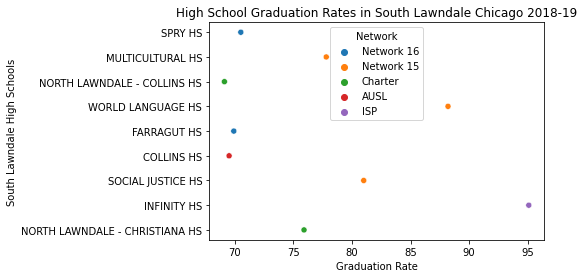

In [121]:
xlab = 'Graduation Rate Per School'
ylab = 'South Lawndale High Schools'
title = 'High School Graduation Rates in South Lawndale Chicago 2018-19'

plt.xlabel('Graduation Rate')
plt.ylabel('South Lawndale High Schools')

plt.title('High School Graduation Rates in South Lawndale Chicago 2018-19')

sns.scatterplot(x="Graduation_Rate_School", y="Short_Name", data = cpdf6, hue = "Network")




In [82]:
cpdf7 = pd.read_sql("SELECT Short_Name, Network, Student_Count_English_Learners FROM cp_tbl WHERE Zip ='60624'",conn)

In [83]:
print(cpdf7)

        Short_Name     Network  Student_Count_English_Learners
0          RABY HS  Network 15                            13.0
1      MARSHALL HS  Network 15                             1.0
2           ORR HS        AUSL                             8.0
3    LEGAL PREP HS     Charter                             0.0
4   NOBLE - DRW HS     Charter                             2.0
5  WESTINGHOUSE HS  Network 15                            25.0


In [85]:
cpdf8 = pd.read_sql("SELECT Short_Name, Network, ROUND((Student_Count_English_Learners/Student_Count_Total * 100),0) AS HS_Percent_ELLs, Classroom_Languages, Bilingual_Services FROM cp_tbl WHERE Zip ='60624'",conn)

In [86]:
print(cpdf8)

        Short_Name     Network  HS_Percent_ELLs       Classroom_Languages  \
0          RABY HS  Network 15              4.0                   Spanish   
1      MARSHALL HS  Network 15              0.0                   Spanish   
2           ORR HS        AUSL              3.0                   Spanish   
3    LEGAL PREP HS     Charter              0.0                   Spanish   
4   NOBLE - DRW HS     Charter              1.0                      None   
5  WESTINGHOUSE HS  Network 15              2.0  Chinese, French, Spanish   

   Bilingual_Services  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  
5                   0  


In [97]:
cpdf9 = pd.read_sql("SELECT Short_Name, Network, ROUND((Student_Count_Special_Ed/Student_Count_Total * 100),0) AS HS_Percent_Sp_Ed, Student_Count_Total, Graduation_Rate_School, Significantly_Modified FROM cp_tbl WHERE Zip ='60624'",conn)

In [98]:
print(cpdf9)

        Short_Name     Network  HS_Percent_Sp_Ed  Student_Count_Total  \
0          RABY HS  Network 15              28.0                339.0   
1      MARSHALL HS  Network 15              28.0                253.0   
2           ORR HS        AUSL              25.0                235.0   
3    LEGAL PREP HS     Charter              21.0                332.0   
4   NOBLE - DRW HS     Charter              31.0                340.0   
5  WESTINGHOUSE HS  Network 15               7.0               1202.0   

   Graduation_Rate_School  Significantly_Modified  
0                    73.1                     1.0  
1                    51.5                     NaN  
2                    38.3                     NaN  
3                    59.8                     NaN  
4                    71.4                     NaN  
5                    98.3                     1.0  


<AxesSubplot:title={'center':'High School Graduation Rates in West Garfield Chicago 2018-19'}, xlabel='Graduation Rate', ylabel='West Garfield High Schools'>

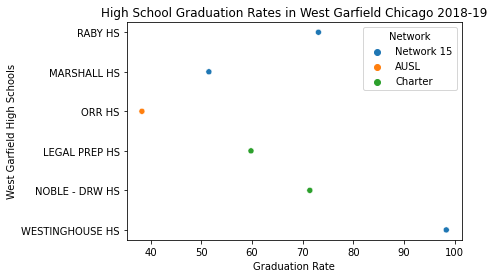

In [122]:
xlab = 'Graduation Rate Per School'
ylab = 'West Garfield High Schools'
title = 'High School Graduation Rates in West Garfield Chicago 2018-19'

plt.xlabel('Graduation Rate')
plt.ylabel('West Garfield High Schools')

plt.title('High School Graduation Rates in West Garfield Chicago 2018-19')

sns.scatterplot(x="Graduation_Rate_School", y="Short_Name", data = cpdf9, hue = "Network")
